# Comparison of predicted data between midthickness, pial and white

In [1]:
from utils.metrics import smallest_angle, distance_PolarCoord, average_prediction
import numpy as np
import nibabel as nib
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from python_visualization.visualization import roi
import pandas as pd

folder_path = "/neurodesktop-storage/nyu_retinotopy_data/"
folders = {
    "pial2mid": os.path.join(folder_path, "freesurfer_pial2mid"),
    "white2mid": os.path.join(folder_path, "freesurfer_white2mid"),
    "midthickness": os.path.join(folder_path, "freesurfer_test"),
}

subjects = [
    subject for subject in os.listdir(folders["midthickness"])
    if os.path.isdir(os.path.join(folders["midthickness"], subject)) and subject.startswith("sub-wlsubj")
]

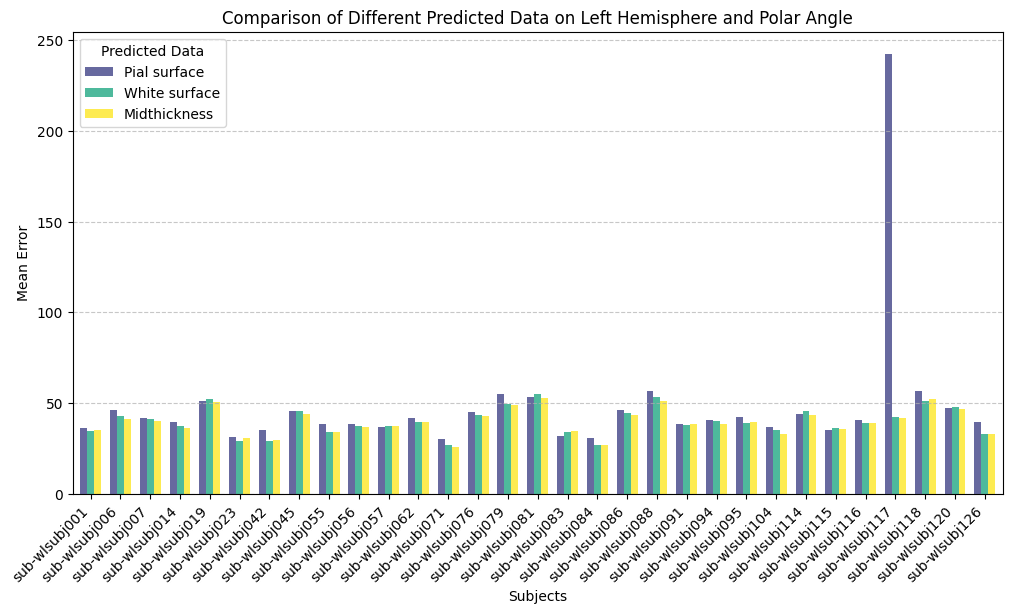

In [2]:
mean_errors = {key: [] for key in folders.keys()}

for subject in subjects:
    empirical_path = os.path.join(folders["midthickness"], subject, "surf", "fs_empirical.lh.32k_fs_LR.func.gii")
    
    
    # Number of nodes
    number_cortical_nodes = int(64984)
    number_hemi_nodes = int(number_cortical_nodes / 2)
    
    # visual cortex mask
    final_mask_L, final_mask_R, index_L_mask, index_R_mask = roi(['ROI'])
    
    # Applying Mask
    empirical_data = np.array(nib.load(empirical_path).darrays[0].data).reshape(number_hemi_nodes, 1)
    empirical_data = empirical_data[final_mask_L == 1].reshape(-1, 1)
    
    for version, path in folders.items():
        predicted_path = os.path.join(path, subject, "deepRetinotopy", f"{subject}.fs_predicted_polarAngle_lh_curvatureFeat_model.func.gii")
    
        # read predicted data
        predicted_data = np.array(nib.load(predicted_path).darrays[0].data).reshape(number_hemi_nodes, 1)
        predicted_data = predicted_data[final_mask_L == 1].reshape(-1, 1)
        
        # Transforming angle to radians
        angle_error = smallest_angle(empirical_data * np.pi / 180, predicted_data*np.pi/180)
        # print("angle_error:", subject, angle_error)

        mean_error = np.mean(angle_error)
        mean_errors[version].append(mean_error)
        
        
for version in folders.keys():
    mean_errors[version] = np.array(mean_errors[version])

df_errors = pd.DataFrame(mean_errors, index=subjects)
df_errors.index.name = "Subject"

colors = cm.viridis(np.linspace(0.2, 1, len(folders)))
label = ['Pial surface', 'White surface', 'Midthickness']

df_errors.plot(kind="bar", figsize=(12, 6), color=colors, alpha=0.8, width=0.7)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Subjects")
plt.ylabel("Mean Error")
plt.title("Comparison of Different Predicted Data on Left Hemisphere and Polar Angle")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Predicted Data", labels=label)
plt.show()

In [1]:
# Line chart
df_errors.plot(kind="line", figsize=(12, 6), color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Subjects")
plt.ylabel("Mean Error")
plt.title("Comparison of Different Predicted Data on Left Hemisphere and Polar Angle")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Predicted Data", labels=label)
plt.show()

NameError: name 'df_errors' is not defined

# Filter variance explained below 10%

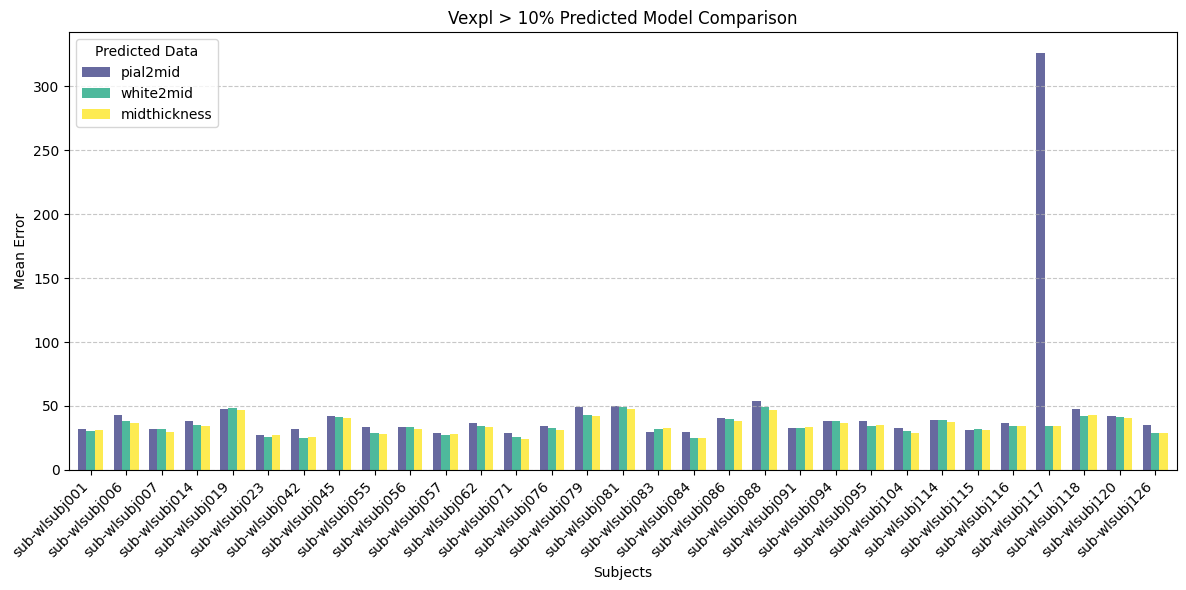

In [3]:
filtered_errors = {key: [] for key in folders.keys()}

for subject in subjects:
    empirical_path = os.path.join(folders["midthickness"], subject, "surf", "fs_empirical.lh.32k_fs_LR.func.gii")
    vexpl_path = os.path.join(folders["midthickness"], subject, "surf", "fs_vexpl.lh.32k_fs_LR.func.gii")

    number_hemi_nodes = 32492
    final_mask_L, final_mask_R, index_L_mask, index_R_mask = roi(['ROI'])

    empirical_data = np.array(nib.load(empirical_path).darrays[0].data).reshape(number_hemi_nodes, 1)
    vexpl_data = np.array(nib.load(vexpl_path).darrays[0].data)
    
    empirical_data = empirical_data[final_mask_L == 1].reshape(-1, 1)
    vexpl_data = vexpl_data[final_mask_L == 1]

    for version, path in folders.items():
        predicted_path = os.path.join(path, subject, "deepRetinotopy", f"{subject}.fs_predicted_polarAngle_lh_curvatureFeat_model.func.gii")
        predicted_data = np.array(nib.load(predicted_path).darrays[0].data).reshape(number_hemi_nodes, 1)
        predicted_data = predicted_data[final_mask_L == 1].reshape(-1, 1)

        angle_error = smallest_angle(empirical_data * np.pi / 180, predicted_data * np.pi / 180)

        valid_mask = vexpl_data > 0.10
        if np.any(valid_mask):
            mean_error = np.mean(angle_error[valid_mask])
        else:
            mean_error = np.nan

        filtered_errors[version].append(mean_error)

df_filtered = pd.DataFrame(filtered_errors, index=subjects)
df_filtered.index.name = "Subject"

colors = cm.viridis(np.linspace(0.2, 1, len(folders)))
df_filtered.plot(kind="bar", figsize=(12, 6), color=colors, alpha=0.8, width=0.7)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Subjects")
plt.ylabel("Mean Error")
plt.title("Vexpl > 10% Predicted Model Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Predicted Data")
plt.tight_layout()
plt.show()


# Comparison based on Right Hemisphere

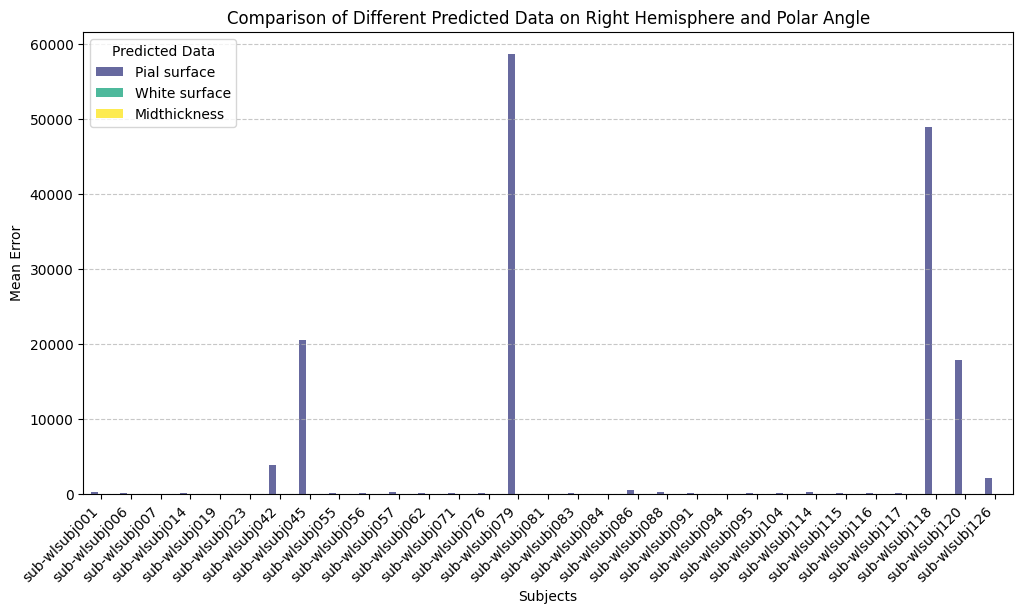

In [24]:
from utils.metrics import smallest_angle, distance_PolarCoord, average_prediction
import numpy as np
import nibabel as nib
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from python_visualization.visualization import roi
import pandas as pd

folder_path = "/neurodesktop-storage/nyu_retinotopy_data/"
folders = {
    "pial2mid": os.path.join(folder_path, "freesurfer_pial2mid"),
    "white2mid": os.path.join(folder_path, "freesurfer_white2mid"),
    "midthickness": os.path.join(folder_path, "freesurfer_test"),
}

subjects = [
    subject for subject in os.listdir(folders["midthickness"])
    if os.path.isdir(os.path.join(folders["midthickness"], subject)) and subject.startswith("sub-wlsubj")
]

mean_errors = {key: [] for key in folders.keys()}

for subject in subjects:
    empirical_path = os.path.join(folders["midthickness"], subject, "surf", "fs_empirical.rh.32k_fs_LR.func.gii")
    
    
    # Number of nodes
    number_cortical_nodes = int(64984)
    number_hemi_nodes = int(number_cortical_nodes / 2)
    
    # visual cortex mask
    final_mask_L, final_mask_R, index_L_mask, index_R_mask = roi(['ROI'])
    
    # Applying Mask
    empirical_data = np.array(nib.load(empirical_path).darrays[0].data).reshape(number_hemi_nodes, 1)
    empirical_data = empirical_data[final_mask_R == 1].reshape(-1, 1)
    
    for version, path in folders.items():
        predicted_path = os.path.join(path, subject, "deepRetinotopy", f"{subject}.fs_predicted_polarAngle_rh_curvatureFeat_model.func.gii")
    
        # read predicted data
        predicted_data = np.array(nib.load(predicted_path).darrays[0].data).reshape(number_hemi_nodes, 1)
        predicted_data = predicted_data[final_mask_R == 1].reshape(-1, 1)
        
        # Transforming angle to radians
        angle_error = smallest_angle(empirical_data * np.pi / 180, predicted_data*np.pi/180)
        # print("angle_error:", subject, angle_error)


        mean_error = np.mean(angle_error)
        mean_errors[version].append(mean_error)
        
        
for version in folders.keys():
    mean_errors[version] = np.array(mean_errors[version])

df_errors = pd.DataFrame(mean_errors, index=subjects)
df_errors.index.name = "Subject"

# df_errors = df_errors.clip(upper=150)

colors = cm.viridis(np.linspace(0.2, 1, len(folders)))
label = ['Pial surface', 'White surface', 'Midthickness']

df_errors.plot(kind="bar", figsize=(12, 6), color=colors, alpha=0.8, width=0.7)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Subjects")
plt.ylabel("Mean Error")
plt.title("Comparison of Different Predicted Data on Right Hemisphere and Polar Angle")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Predicted Data", labels=label, loc='upper left')
plt.show()

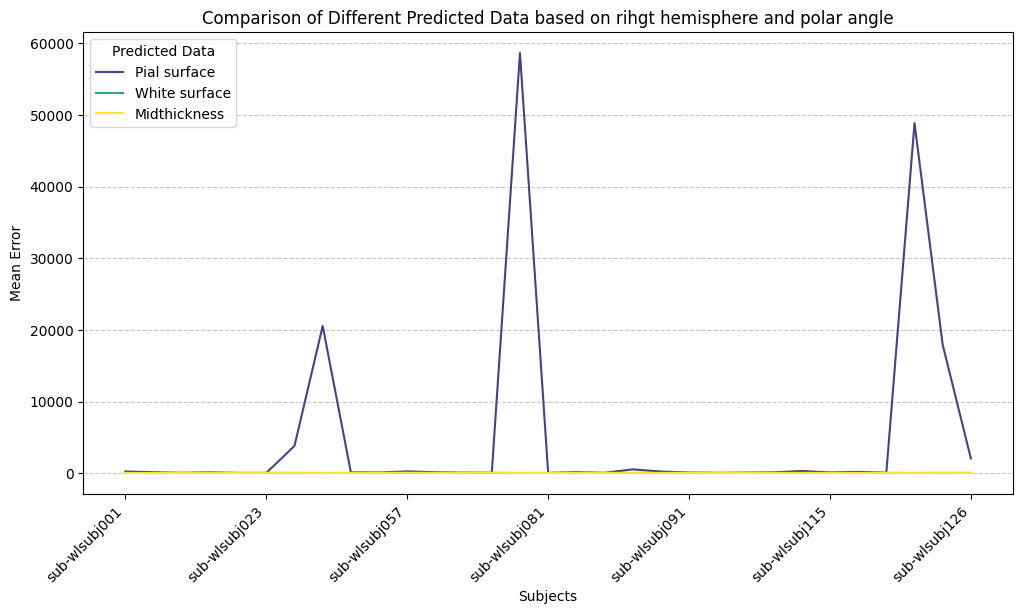

In [5]:
# Line chart
df_errors.plot(kind="line", figsize=(12, 6), color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Subjects")
plt.ylabel("Mean Error")
plt.title("Comparison of Different Predicted Data based on rihgt hemisphere and polar angle")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Predicted Data", labels=label)
plt.show()

# Comparison based on Left Hemisphere, eccentricity

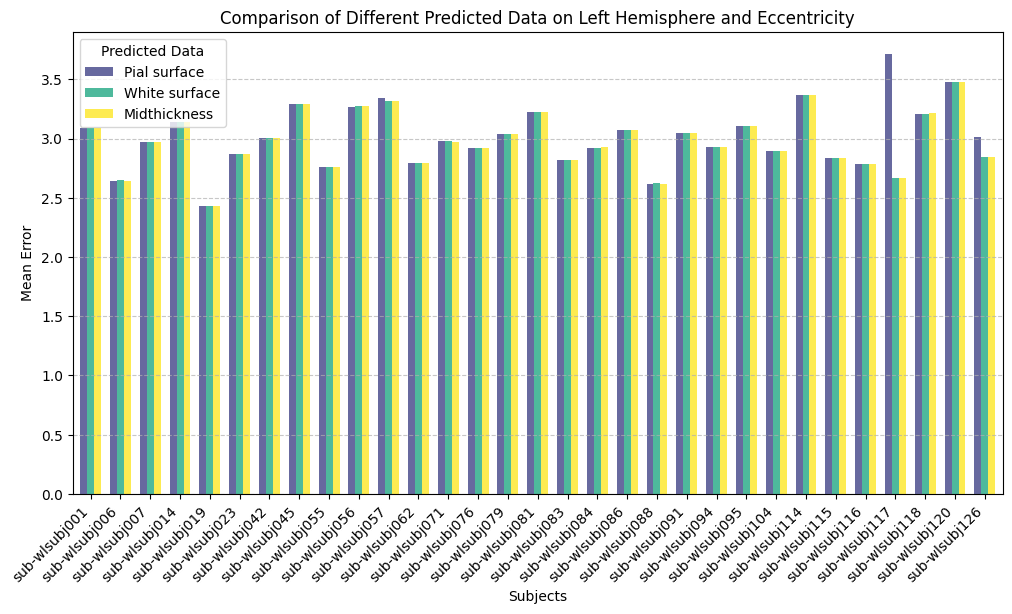

In [4]:
from utils.metrics import smallest_angle, distance_PolarCoord, average_prediction
import numpy as np
import nibabel as nib
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from python_visualization.visualization import roi
import pandas as pd

folder_path = "/neurodesktop-storage/nyu_retinotopy_data/"
folders = {
    "pial2mid": os.path.join(folder_path, "freesurfer_pial2mid"),
    "white2mid": os.path.join(folder_path, "freesurfer_white2mid"),
    "midthickness": os.path.join(folder_path, "freesurfer_test"),
}

subjects = [
    subject for subject in os.listdir(folders["midthickness"])
    if os.path.isdir(os.path.join(folders["midthickness"], subject)) and subject.startswith("sub-wlsubj")
]

mean_errors = {key: [] for key in folders.keys()}

for subject in subjects:
    empirical_path = os.path.join(folders["midthickness"], subject, "surf", "fs_empirical.lh.32k_fs_LR.func.gii")
    
    # Number of nodes
    number_cortical_nodes = int(64984)
    number_hemi_nodes = int(number_cortical_nodes / 2)
    
    # visual cortex mask
    final_mask_L, final_mask_R, index_L_mask, index_R_mask = roi(['ROI'])
    
    # Applying Mask
    empirical_data = np.array(nib.load(empirical_path).darrays[0].data).reshape(number_hemi_nodes, 1)
    empirical_data = empirical_data[final_mask_L == 1].reshape(-1, 1)
    
    for version, path in folders.items():
        predicted_path = os.path.join(path, subject, "deepRetinotopy", f"{subject}.fs_predicted_eccentricity_lh_curvatureFeat_model.func.gii")
    
        # read predicted data
        predicted_data = np.array(nib.load(predicted_path).darrays[0].data).reshape(number_hemi_nodes, 1)
        predicted_data = predicted_data[final_mask_L == 1].reshape(-1, 1)
        
        ecc_error = np.abs(empirical_data * np.pi / 180 - predicted_data * np.pi / 180)
        # print("ecc_error:", subject, ecc_error)

        mean_error = np.mean(ecc_error)
        mean_errors[version].append(mean_error)
        
        
for version in folders.keys():
    mean_errors[version] = np.array(mean_errors[version])

df_errors = pd.DataFrame(mean_errors, index=subjects)
df_errors.index.name = "Subject"

colors = cm.viridis(np.linspace(0.2, 1, len(folders)))
label = ['Pial surface', 'White surface', 'Midthickness']

df_errors.plot(kind="bar", figsize=(12, 6), color=colors, alpha=0.8, width=0.7)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Subjects")
plt.ylabel("Mean Error")
plt.title("Comparison of Different Predicted Data on Left Hemisphere and Eccentricity")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Predicted Data", labels=label)
# plt.savefig("Comparison of Different Predicted Data based on Left Hemisphere and Eccentricity.png")
plt.show()

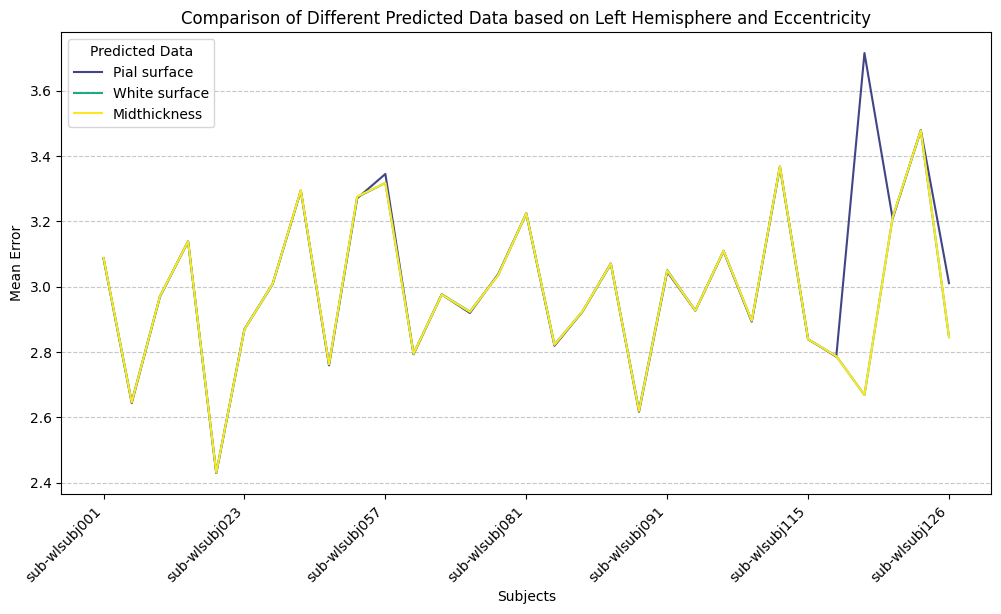

In [23]:
# Line chart
df_errors.plot(kind="line", figsize=(12, 6), color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Subjects")
plt.ylabel("Mean Error")
plt.title("Comparison of Different Predicted Data based on Left Hemisphere and Eccentricity")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Predicted Data", labels=label)
# plt.savefig("Comparison of Different Predicted Data based on Left Hemisphere and Eccentricity.png")
plt.show()

# Comparison based on Right Hemisphere, eccentricity

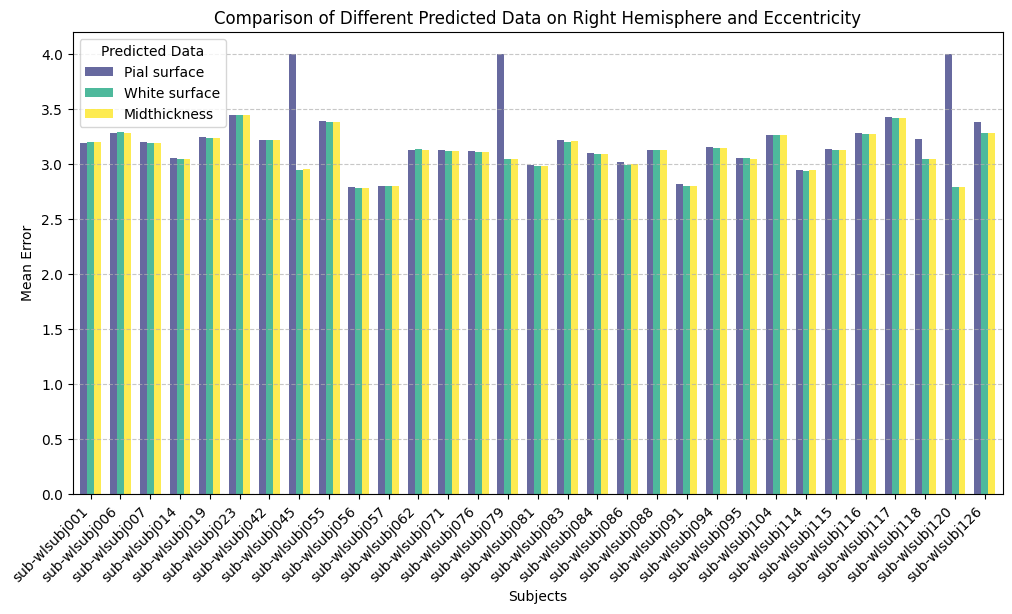

In [25]:
from utils.metrics import smallest_angle, distance_PolarCoord, average_prediction
import numpy as np
import nibabel as nib
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from python_visualization.visualization import roi
import pandas as pd

folder_path = "/neurodesktop-storage/nyu_retinotopy_data/"
folders = {
    "pial2mid": os.path.join(folder_path, "freesurfer_pial2mid"),
    "white2mid": os.path.join(folder_path, "freesurfer_white2mid"),
    "midthickness": os.path.join(folder_path, "freesurfer_test"),
}

subjects = [
    subject for subject in os.listdir(folders["midthickness"])
    if os.path.isdir(os.path.join(folders["midthickness"], subject)) and subject.startswith("sub-wlsubj")
]

mean_errors = {key: [] for key in folders.keys()}

for subject in subjects:
    empirical_path = os.path.join(folders["midthickness"], subject, "surf", "fs_empirical.rh.32k_fs_LR.func.gii")
    
    # Number of nodes
    number_cortical_nodes = int(64984)
    number_hemi_nodes = int(number_cortical_nodes / 2)
    
    # visual cortex mask
    final_mask_L, final_mask_R, index_L_mask, index_R_mask = roi(['ROI'])
    
    # Applying Mask
    empirical_data = np.array(nib.load(empirical_path).darrays[0].data).reshape(number_hemi_nodes, 1)
    empirical_data = empirical_data[final_mask_R == 1].reshape(-1, 1)
    
    for version, path in folders.items():
        predicted_path = os.path.join(path, subject, "deepRetinotopy", f"{subject}.fs_predicted_eccentricity_rh_curvatureFeat_model.func.gii")
    
        # read predicted data
        predicted_data = np.array(nib.load(predicted_path).darrays[0].data).reshape(number_hemi_nodes, 1)
        predicted_data = predicted_data[final_mask_R == 1].reshape(-1, 1)
        
        ecc_error = np.abs(empirical_data * np.pi / 180 - predicted_data * np.pi / 180)
        # print("ecc_error:", subject, ecc_error)

        mean_error = np.mean(ecc_error)
        mean_errors[version].append(mean_error)
        
        
for version in folders.keys():
    mean_errors[version] = np.array(mean_errors[version])

df_errors = pd.DataFrame(mean_errors, index=subjects)
df_errors.index.name = "Subject"

colors = cm.viridis(np.linspace(0.2, 1, len(folders)))
label = ['Pial surface', 'White surface', 'Midthickness']

# df_errors = df_errors.clip(upper=4)

df_errors.plot(kind="bar", figsize=(12, 6), color=colors, alpha=0.8, width=0.7)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Subjects")
plt.ylabel("Mean Error")
plt.title("Comparison of Different Predicted Data on Right Hemisphere and Eccentricity")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Predicted Data", labels=label)
# plt.savefig("Comparison of Different Predicted Data based on Right Hemisphere and Eccentricity.png")
plt.show()

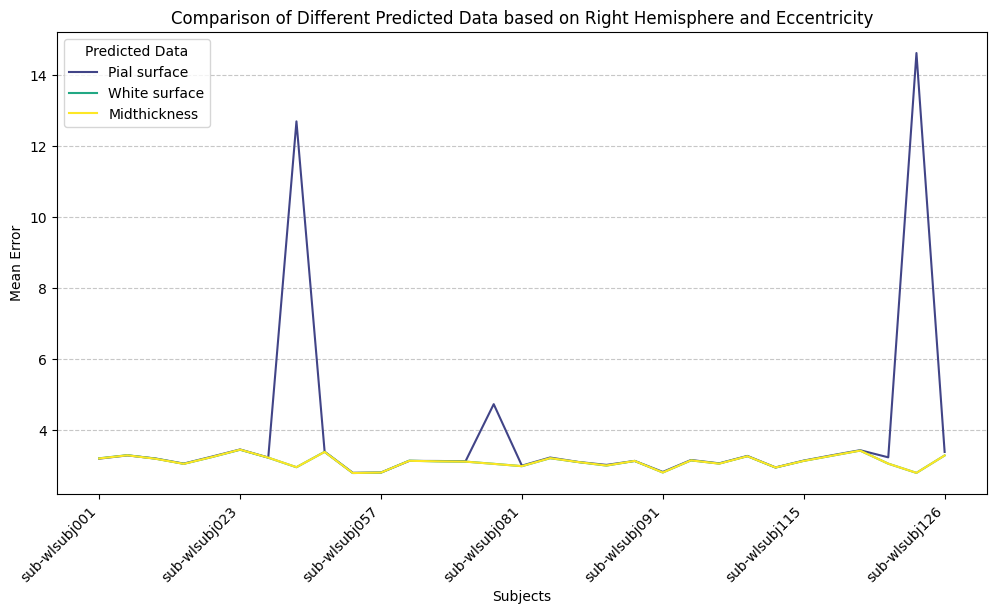

In [3]:
# Line chart
df_errors.plot(kind="line", figsize=(12, 6), color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Subjects")
plt.ylabel("Mean Error")
plt.title("Comparison of Different Predicted Data based on Right Hemisphere and Eccentricity")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Predicted Data", labels=label)
# plt.savefig("Comparison of Different Predicted Data based on Right Hemisphere and Eccentricity.png")
plt.show()